Soal UAS - Data Analytics
1. ID Tree dan Random Forest (35%)
Carilah sebuah dataset yang dapat digunakan untuk eksperimen, misalnya dataset untuk
persiapan tesis Anda. Buatlah program untuk melakukan analisis data. Silakan bisa
menggunakan modul pyspark, sklearn atau sejenisnya.
Decision tree (ID3):
- Gunakan atribut yang sudah dipilih sejalan dengan hipotesis anda, misalnya untuk memprediksi sesuatu
- Apakah performa decision tree anda mirip dengan hipotesis yang diperkirakan?

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('../input/datasetsnmptn/Dataset-SNMPTN (rev) - Data Analytics - 1 (4).csv')

dataset.head()

,nis,year,math-1,math-2,math-3,math-4,math-5,indo-1,indo-2,indo-3,...,sch_acr,snmptn_adms,colg,colg_rank,major,quota,appl,%chance,linier,snmptn
0,161700001,2019,70,75,85,87,84,84,87,83,...,4,0,0,0,0,0,0,0.0,0,0
1,161710002,2019,75,82,91,93,92,82,85,86,...,4,0,0,0,0,0,0,0.0,0,0
2,161710003,2019,75,75,73,80,88,80,84,86,...,4,0,0,0,0,0,0,0.0,0,0
3,161710004,2019,89,93,95,97,96,82,87,86,...,4,0,0,0,0,0,0,0.0,0,0
4,161710005,2019,93,95,77,85,93,83,85,85,...,4,0,0,0,0,0,0,0.0,0,0


In [3]:
dataset.shape

(476, 43)

In [4]:
dataset.columns

Index(['nis', 'year', 'math-1', 'math-2', 'math-3', 'math-4', 'math-5',
       'indo-1', 'indo-2', 'indo-3', 'indo-4', 'indo-5', 'eng-1', 'eng-2',
       'eng-3', 'eng-4', 'eng-5', 'fiso-1', 'fiso-2', 'fiso-3', 'fiso-4',
       'fiso-5', 'kiko-1', 'kiko-2', 'kiko-3', 'kiko-4', 'kiko-5', 'bige-1',
       'bige-2', 'bige-3', 'bige-4', 'bige-5', 'tot_scor', 'sch_acr',
       'snmptn_adms', 'colg', 'colg_rank', 'major', 'quota', 'appl', '%chance',
       'linier', 'snmptn'],
      dtype='object')

In [5]:
dataset.dtypes

nis              int64
year             int64
math-1           int64
math-2           int64
math-3           int64
math-4           int64
math-5           int64
indo-1           int64
indo-2           int64
indo-3           int64
indo-4           int64
indo-5           int64
eng-1            int64
eng-2            int64
eng-3            int64
eng-4            int64
eng-5            int64
fiso-1           int64
fiso-2           int64
fiso-3           int64
fiso-4           int64
fiso-5           int64
kiko-1           int64
kiko-2           int64
kiko-3           int64
kiko-4           int64
kiko-5           int64
bige-1           int64
bige-2           int64
bige-3           int64
bige-4           int64
bige-5           int64
tot_scor       float64
sch_acr          int64
snmptn_adms      int64
colg             int64
colg_rank        int64
major            int64
quota            int64
appl             int64
%chance        float64
linier           int64
snmptn           int64
dtype: obje

In [6]:
dataset.info

<bound method DataFrame.info of            nis  year  math-1  math-2  math-3  math-4  math-5  indo-1  indo-2  \
0    161700001  2019      70      75      85      87      84      84      87   
1    161710002  2019      75      82      91      93      92      82      85   
2    161710003  2019      75      75      73      80      88      80      84   
3    161710004  2019      89      93      95      97      96      82      87   
4    161710005  2019      93      95      77      85      93      83      85   
..         ...   ...     ...     ...     ...     ...     ...     ...     ...   
471  192010110  2022      71      72      75      78      84      83      85   
472  192010111  2022      73      74      76      78      85      83      86   
473  192010112  2022      80      82      83      84      88      81      83   
474  192010113  2022      81      82      83      84      84      81      83   
475  192010114  2022      74      75      77      80      86      81      82   

     in

In [7]:
dataset.isna().values.any()

False

In [8]:
dataset[dataset.duplicated()]

,nis,year,math-1,math-2,math-3,math-4,math-5,indo-1,indo-2,indo-3,...,sch_acr,snmptn_adms,colg,colg_rank,major,quota,appl,%chance,linier,snmptn


In [9]:
dataset.duplicated().value_counts()

False    476
dtype: int64

In [10]:
dataset.describe()

,nis,year,math-1,math-2,math-3,math-4,math-5,indo-1,indo-2,indo-3,...,sch_acr,snmptn_adms,colg,colg_rank,major,quota,appl,%chance,linier,snmptn
count,4.760000e+02,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,...,476.0,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.764569e+08,2020.451681,78.504202,80.184874,81.380252,83.176471,86.491597,82.934874,85.428571,88.090336,...,4.0,0.254202,1.691176,3.310924,3.663866,9.554622,171.392857,1.571197,0.151261,0.042017
std,1.157850e+07,1.138687,6.822716,6.793764,6.109901,6.092822,4.852556,4.423616,3.822529,3.296287,...,0.0,0.435870,4.261851,10.778730,9.654693,27.467247,494.946554,6.160044,0.358680,0.200839
min,1.617000e+08,2019.000000,65.000000,63.000000,70.000000,61.000000,78.000000,65.000000,66.000000,76.000000,...,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.617101e+08,2019.000000,74.000000,75.000000,77.000000,79.000000,83.000000,80.000000,83.000000,86.000000,...,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.819100e+08,2021.000000,77.000000,79.000000,80.000000,82.000000,86.000000,83.000000,85.000000,88.000000,...,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.819101e+08,2021.000000,82.000000,85.000000,85.000000,87.000000,90.000000,85.000000,88.000000,90.000000,...,4.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.021111e+08,2022.000000,100.000000,100.000000,100.000000,100.000000,100.000000,93.000000,95.000000,96.000000,...,4.0,1.000000,18.000000,91.000000,46.000000,228.000000,3745.000000,100.000000,1.000000,1.000000


In [11]:
dataset.corr()

,nis,year,math-1,math-2,math-3,math-4,math-5,indo-1,indo-2,indo-3,...,sch_acr,snmptn_adms,colg,colg_rank,major,quota,appl,%chance,linier,snmptn
nis,1.000000,0.995211,-0.049100,-0.216651,-0.160889,-0.138847,0.026241,0.264553,0.073091,0.064749,...,NaN,0.346878,0.119202,0.058594,0.091418,0.061480,0.103535,0.011712,0.106875,0.107882
year,0.995211,1.000000,-0.048887,-0.216010,-0.155462,-0.123182,0.031359,0.267489,0.077318,0.067631,...,NaN,0.349294,0.120339,0.060918,0.092545,0.057871,0.101491,0.011607,0.105561,0.110158
math-1,-0.049100,-0.048887,1.000000,0.894558,0.797324,0.752050,0.703353,0.442147,0.476198,0.461997,...,NaN,0.349713,0.196870,0.154742,0.236847,0.285398,0.262266,0.179793,0.316325,0.194993
math-2,-0.216651,-0.216010,0.894558,1.000000,0.901387,0.852898,0.772683,0.348208,0.442002,0.435926,...,NaN,0.309001,0.170810,0.152534,0.216381,0.278484,0.233753,0.181466,0.296931,0.197963
math-3,-0.160889,-0.155462,0.797324,0.901387,1.000000,0.935160,0.832631,0.356029,0.440376,0.419971,...,NaN,0.325688,0.171310,0.129874,0.207918,0.261036,0.222401,0.181020,0.299360,0.204838
math-4,-0.138847,-0.123182,0.752050,0.852898,0.935160,1.000000,0.871613,0.363564,0.443561,0.423220,...,NaN,0.336635,0.160038,0.128833,0.204543,0.238681,0.199473,0.175946,0.275800,0.200381
math-5,0.026241,0.031359,0.703353,0.772683,0.832631,0.871613,1.000000,0.432338,0.471208,0.441161,...,NaN,0.377755,0.198939,0.125027,0.232485,0.270020,0.246024,0.167255,0.307961,0.240142
indo-1,0.264553,0.267489,0.442147,0.348208,0.356029,0.363564,0.432338,1.000000,0.933929,0.747999,...,NaN,0.285940,0.185082,0.063255,0.203167,0.182383,0.166098,0.135481,0.221172,0.225832
indo-2,0.073091,0.077318,0.476198,0.442002,0.440376,0.443561,0.471208,0.933929,1.000000,0.796243,...,NaN,0.245313,0.159985,0.052147,0.195640,0.186594,0.139635,0.134142,0.192156,0.209587
indo-3,0.064749,0.067631,0.461997,0.435926,0.419971,0.423220,0.441161,0.747999,0.796243,1.000000,...,NaN,0.299022,0.214490,0.138631,0.248563,0.240502,0.189250,0.173540,0.266197,0.213678


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<AxesSubplot:>

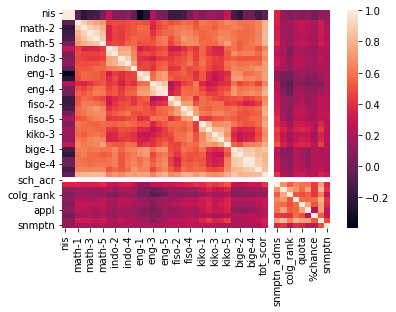

In [13]:
sns.heatmap(data=dataset.corr())

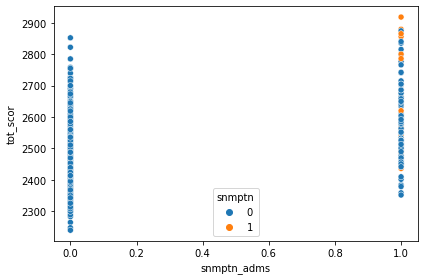

In [14]:
sns.scatterplot(x='snmptn_adms', y='tot_scor', data=dataset, hue='snmptn')
plt.tight_layout()

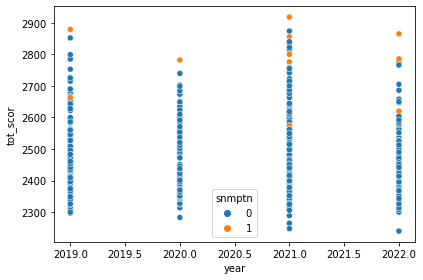

In [15]:
sns.scatterplot(x='year', y='tot_scor', data=dataset, hue='snmptn')
plt.tight_layout()

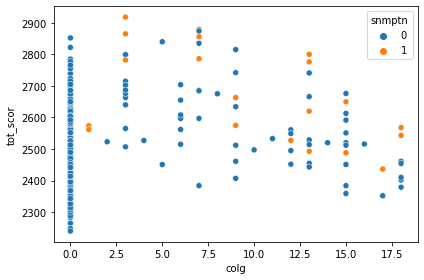

In [16]:
sns.scatterplot(x='colg', y='tot_scor', data=dataset, hue='snmptn')
plt.tight_layout()

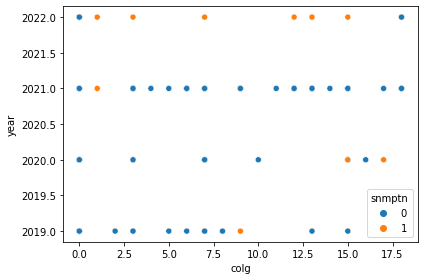

In [17]:
sns.scatterplot(x='colg', y='year', data=dataset, hue='snmptn')
plt.tight_layout()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [19]:
X = dataset.drop(columns='snmptn')
X.head()

,nis,year,math-1,math-2,math-3,math-4,math-5,indo-1,indo-2,indo-3,...,tot_scor,sch_acr,snmptn_adms,colg,colg_rank,major,quota,appl,%chance,linier
0,161700001,2019,70,75,85,87,84,84,87,83,...,2500.0,4,0,0,0,0,0,0,0.0,0
1,161710002,2019,75,82,91,93,92,82,85,86,...,2562.0,4,0,0,0,0,0,0,0.0,0
2,161710003,2019,75,75,73,80,88,80,84,86,...,2427.0,4,0,0,0,0,0,0,0.0,0
3,161710004,2019,89,93,95,97,96,82,87,86,...,2662.0,4,0,0,0,0,0,0,0.0,0
4,161710005,2019,93,95,77,85,93,83,85,85,...,2550.0,4,0,0,0,0,0,0,0.0,0


In [20]:
y = dataset['snmptn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: snmptn, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(285, 42)
(285,)

testing dataset:
(191, 42)
(191,)


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [24]:
print(accuracy_score(y_test, y_pred))

0.9581151832460733


In [25]:
print(confusion_matrix(y_test, y_pred))

[[182   1]
 [  7   1]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       183
           1       0.50      0.12      0.20         8

    accuracy                           0.96       191
   macro avg       0.73      0.56      0.59       191
weighted avg       0.94      0.96      0.95       191



In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [29]:
print(accuracy_score(y_test, y_pred))

0.9581151832460733


In [30]:
print(confusion_matrix(y_test, y_pred))

[[182   1]
 [  7   1]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       183
           1       0.50      0.12      0.20         8

    accuracy                           0.96       191
   macro avg       0.73      0.56      0.59       191
weighted avg       0.94      0.96      0.95       191



In [32]:
models = [model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.9581151832460733, 0.9633507853403142]


In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier (max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

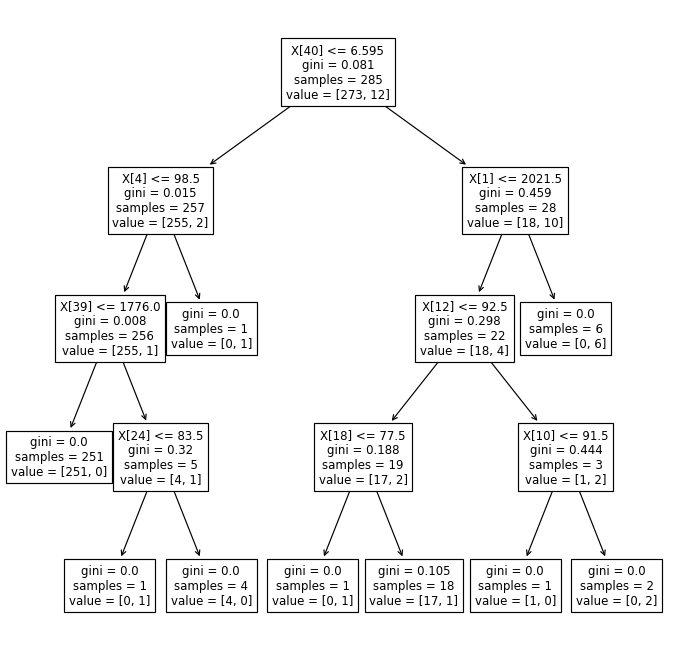

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()